In [63]:
# On se place dans trois villes de France qui contiennent suffisamment de données
# J'ai choisi Nantes, Lyon, Marseille
# Le but est dans un premier temps est d'effectuer une première analyse des données
# Les données sont dèja filtrées selon les paramètres suivant :

# - Suppression des colonnes vides
# - Suppression des doublons (lignes identiques)
# - On garde uniquement les ventes sur des Maisons et Appartements
# - Afin de s'assurer de la qualité des données, je choisis de supprimer les ventes de moins de 10 000€
# - Choix d'une ville, car les prix son très dépendant de la situation géographique d'un bien
# - Je choisis également de supprimer les ventes de plus de 3 000 000€ (car trop particulier comme vente)
# - Conversion en float et on garde uniquement les colonnes que j'ai estimé pertinentes 

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

# On importe les données afin de les analyser visuellement 
nantes = pd.read_csv('Projet/Data/NANTES_44_data.csv')
lyon = pd.read_csv('Projet/Data/LYON_69_data.csv')
marseille = pd.read_csv('Projet/Data/MARSEILLE_13_data.csv')

In [61]:
# Analyse des données
def analyse(data) :
    
    print(data['Valeur fonciere'].describe())
    res = stats.probplot(data['Valeur fonciere'], plot=plt)

    # Top 10 HeatMap
    matrice = data.corr()
    k = 10 # Nombre de variables à garder dans la HeatMap
    cols = matrice.nlargest(k, 'Valeur fonciere')['Valeur fonciere'].index
    cm = np.corrcoef(data[cols].values.T)
    sns.set(font_scale=1.0)
    f, ax = plt.subplots(figsize=(12, 6))
    hm = sns.heatmap(cm, annot=True, square=True, 
                     annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)

count    3.350000e+03
mean     3.632791e+05
std      3.908394e+05
min      1.000000e+04
25%      1.692250e+05
50%      2.557000e+05
75%      3.950000e+05
max      2.849000e+06
Name: Valeur fonciere, dtype: float64


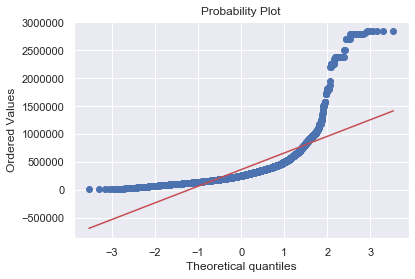

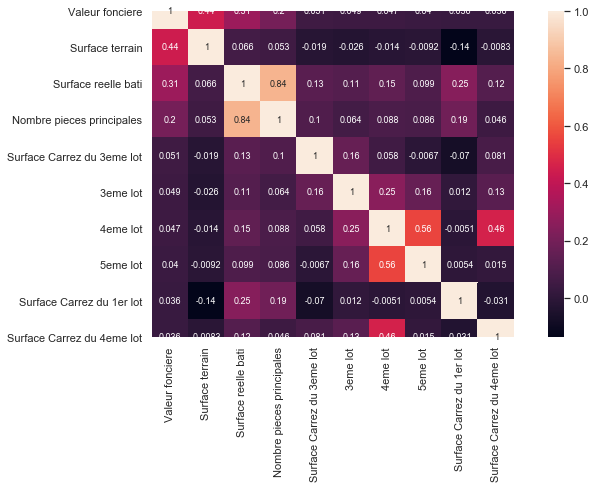

In [62]:
# Faire l'analyse des trois villes
analyse(lyon)